In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
raw_data = pd.read_csv('data/tabular_data/moco_adu.csv')

In [10]:
raw_data.head()

,Unnamed: 0,GEOID,TOTAL,MONTH_HC,SCD_TOT,SCD,AD_TOT,AMB_D,ILD_TOT,ILD,...,INCOME_100000_124999,INCOME_125000_149999,INCOME_150000_199999,INCOME_200000_OVER,PS_TOT,PS_POV,PS_POV_PERC,TCOST_IDX,HAZ_IDX,JPI_IDX
0,1,24031700101,4495,2799,4286,26,4286,176,3294,93,...,140,178,264,471,1226,45,3.67,70,55.0,51
1,2,24031700103,5447,2428,5196,133,5196,285,4347,170,...,140,183,153,693,1505,21,1.40,71,53.0,76
2,3,24031700104,5837,2011,5312,56,5312,146,4135,168,...,261,162,254,356,1498,6,0.40,87,NaN,51
3,4,24031700105,5963,2003,5530,49,5530,74,4500,110,...,256,277,351,174,1609,49,3.05,84,NaN,62
4,5,24031700204,1918,1782,1854,77,1854,155,1597,87,...,74,68,105,86,574,22,3.83,68,60.0,58


In [11]:
sorted_columns = raw_data[['GEOID', 'PS_POV_PERC','MED_HH_INCOME',
'INCOME_TOT',
'INCOME_SUB_10000',
'INCOME_10000_14999',
'INCOME_15000_19999',
'INCOME_20000_24999',
'INCOME_25000_29999',
'INCOME_30000_34999',
'INCOME_35000_39999',
'INCOME_40000_44999',
'INCOME_45000_49999',
'INCOME_50000_59999',
'INCOME_60000_74999',
'INCOME_75000_99999',
'INCOME_100000_124999',
'INCOME_125000_149999',
'INCOME_150000_199999',
'INCOME_200000_OVER']]

In [13]:
sorted_columns


,GEOID,PS_POV_PERC,MED_HH_INCOME,INCOME_TOT,INCOME_SUB_10000,INCOME_10000_14999,INCOME_15000_19999,INCOME_20000_24999,INCOME_25000_29999,INCOME_30000_34999,INCOME_35000_39999,INCOME_40000_44999,INCOME_45000_49999,INCOME_50000_59999,INCOME_60000_74999,INCOME_75000_99999,INCOME_100000_124999,INCOME_125000_149999,INCOME_150000_199999,INCOME_200000_OVER
0,24031700101,3.67,157230,1370,11,8,26,10,12,19,29,0,17,37,38,110,140,178,264,471
1,24031700103,1.40,145441,1780,22,1,19,33,12,27,27,34,36,99,157,144,140,183,153,693
2,24031700104,0.40,111439,1876,26,0,15,26,16,44,29,134,0,193,169,191,261,162,254,356
3,24031700105,3.05,102610,2029,29,41,36,66,21,0,55,59,132,128,79,325,256,277,351,174
4,24031700204,3.83,89833,762,39,5,21,18,18,7,6,22,9,71,65,148,74,68,105,86
5,24031700205,1.72,147305,2633,41,29,29,14,12,40,0,53,63,34,160,284,347,250,617,660
6,24031700206,1.48,132424,1774,28,10,28,25,0,24,15,15,19,48,139,231,262,175,356,399
7,24031700207,4.83,99506,1833,42,17,8,98,73,16,73,38,67,95,121,277,317,201,280,110
8,24031700208,2.73,121458,767,24,18,19,6,13,10,17,6,20,36,58,93,75,93,113,166
9,24031700304,7.47,122201,2575,155,40,19,13,0,42,65,39,0,150,250,270,253,339,455,485


In [19]:
sorted_columns['PS_POV_PERC'].max()

24.32

In [21]:
rent_data = raw_data[['RA_TOT',
'RA_SUB_100',
'RA_100_149',
'RA_150_199',
'RA_200_249',
'RA_250_299',
'RA_300_349',
'RA_350_399',
'RA_400_449',
'RA_450_499',
'RA_500_549',
'RA_550_599',
'RA_600_649',
'RA_650_699',
'RA_700_749',
'RA_750_799',
'RA_800_899',
'RA_900_999',
'RA_1000._1249',
'RA_1250_1.499',
'RA_1500._1999',
'RA_2000_2499',
'RA_2500_2999',
'RA_3000_3499',
'R_3500_OVER']]


In [ ]:
rent_data.rename(columns={'RA_1000._1249':'RA_1000_1249',
                          'RA_1250_1.499':'RA_1250_1.499',
                          'RA_1500._1999':'RA_1500_1999',
                         'R_3500_OVER': 'R_3500_OVER'}, 
                 inplace=True)

In [22]:
census = pd.read_csv('data/census_data.csv')

In [123]:
pl_people = raw_data[['GEOID','RELOC_COUNTY_18_19',
'RELOC_COUNTY_20_24',
'RELOC_COUNTY_25_29',
'RELOC_COUNTY_30_34',  'RELOC_COUNTY_65_69',
'RELOC_COUNTY_70_74',
'RELOC_COUNTY_75_OVER','MED_HH_INCOME',
'RELOC_COUNTY_35_39',
'RELOC_COUNTY_40_44',
'RELOC_COUNTY_45_49',
'RELOC_COUNTY_50_54',
'RELOC_COUNTY_55_59',
'RELOC_COUNTY_60_64', 'PS_POV_PERC', 'RELOC_COUNTY'

]]

In [46]:
rent = pd.read_csv('data/data_rent.csv')

In [34]:
rent

,Unnamed: 0,NAME,state,county,tract,Median Gross Rent (Dollars): Median gross rent
0,"Census Tract 7001.01, Montgomery County, Maryland","Census Tract 7001.01, Montgomery County, Maryland",24,31,700101,1484
1,"Census Tract 7001.03, Montgomery County, Maryland","Census Tract 7001.03, Montgomery County, Maryland",24,31,700103,1217
2,"Census Tract 7001.04, Montgomery County, Maryland","Census Tract 7001.04, Montgomery County, Maryland",24,31,700104,2065
3,"Census Tract 7001.05, Montgomery County, Maryland","Census Tract 7001.05, Montgomery County, Maryland",24,31,700105,1713
4,"Census Tract 7002.04, Montgomery County, Maryland","Census Tract 7002.04, Montgomery County, Maryland",24,31,700204,1222
5,"Census Tract 7002.05, Montgomery County, Maryland","Census Tract 7002.05, Montgomery County, Maryland",24,31,700205,1829
6,"Census Tract 7002.06, Montgomery County, Maryland","Census Tract 7002.06, Montgomery County, Maryland",24,31,700206,1833
7,"Census Tract 7002.07, Montgomery County, Maryland","Census Tract 7002.07, Montgomery County, Maryland",24,31,700207,1579
8,"Census Tract 7002.08, Montgomery County, Maryland","Census Tract 7002.08, Montgomery County, Maryland",24,31,700208,1275
9,"Census Tract 7003.04, Montgomery County, Maryland","Census Tract 7003.04, Montgomery County, Maryland",24,31,700304,1734


In [124]:
#rent['GEOID'] = str(rent['state']) + '0' +str(rent['county'])+ '0'+ str(rent['tract'])
rent['GEOID'] = rent['state'].astype(str) + '0'+ rent['county'].astype(str) +rent['tract'].astype(str)
pl_people['GEOID']= pl_people['GEOID'].astype(str)
# rent['county1']= rent['county'].astype(str)
# rent['tract1'] = rent['tract'].asytpe(str)
#print
#rent['GEOID'].astype(str)

C:\Users\593268\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
rent.head()

,Unnamed: 0,NAME,state,county,tract,Median Gross Rent (Dollars): Median gross rent,GEOID
0,"Census Tract 7001.01, Montgomery County, Maryland","Census Tract 7001.01, Montgomery County, Maryland",24,31,700101,1484,24031700101
1,"Census Tract 7001.03, Montgomery County, Maryland","Census Tract 7001.03, Montgomery County, Maryland",24,31,700103,1217,24031700103
2,"Census Tract 7001.04, Montgomery County, Maryland","Census Tract 7001.04, Montgomery County, Maryland",24,31,700104,2065,24031700104
3,"Census Tract 7001.05, Montgomery County, Maryland","Census Tract 7001.05, Montgomery County, Maryland",24,31,700105,1713,24031700105
4,"Census Tract 7002.04, Montgomery County, Maryland","Census Tract 7002.04, Montgomery County, Maryland",24,31,700204,1222,24031700204


In [125]:
df_merge = pl_people.merge(rent, how= 'inner',on= 'GEOID')


df_merge.replace(-666666666, df_merge['Median Gross Rent (Dollars): Median gross rent'].median(), inplace = True)

df_merge['young_movers']= df_merge['RELOC_COUNTY_18_19'] +df_merge['RELOC_COUNTY_20_24']+df_merge['RELOC_COUNTY_25_29']+df_merge['RELOC_COUNTY_30_34']
df_merge['elder_movers']= df_merge['RELOC_COUNTY_65_69'] +df_merge['RELOC_COUNTY_70_74']+df_merge['RELOC_COUNTY_75_OVER']
df_merge['middle_movers']= df_merge['RELOC_COUNTY_35_39'] +df_merge['RELOC_COUNTY_40_44']+df_merge['RELOC_COUNTY_45_49']+df_merge['RELOC_COUNTY_50_54']+df_merge['RELOC_COUNTY_60_64']+df_merge['RELOC_COUNTY_55_59']

total_movers = df_merge['RELOC_COUNTY'].sum()
percent_young_movers = df_merge['young_movers'].sum()/ total_movers
percent_elder_movers = df_merge['elder_movers'].sum()/ total_movers
percent_middle_movers = df_merge['middle_movers'].sum()/ total_movers

#'RELOC_COUNTY_18_19',
# 'RELOC_COUNTY_20_24',
# 'RELOC_COUNTY_25_29',
# 'RELOC_COUNTY_30_34',  'RELOC_COUNTY_65_69',
# 'RELOC_COUNTY_70_74',
# 'RELOC_COUNTY_75_OVER','MED_HH_INCOME',
# 'RELOC_COUNTY_35_39',
# 'RELOC_COUNTY_40_44',
# 'RELOC_COUNTY_45_49',
# 'RELOC_COUNTY_50_54',
# 'RELOC_COUNTY_55_59',
# 'RELOC_COUNTY_60_64'



#df_merge['rate_under100'] = df_merge['RELOC_PL_SUB_100']/ df_merge['RELOC_POV_TOT']

In [120]:
total_movers = df_merge['RELOC_TOT'].sum()
percent_young_movers = df_merge['young_movers'].sum()/ total_movers
percent_elder_movers = df_merge['elder_movers'].sum()/ total_movers
percent_middle_movers = df_merge['middle_movers'].sum()/ total_movers

In [122]:
df_merge['young_movers'].sum()

28173

In [129]:
percent_elder_movers +percent_middle_movers+percent_young_movers

0.75362632880414

0.32922476865424327

0.35910214903000487

In [84]:
df_merge

,GEOID,RELOC_COUNTY_18_19,RELOC_COUNTY_20_24,RELOC_COUNTY_25_29,RELOC_COUNTY_30_34,RELOC_COUNTY_65_69,RELOC_COUNTY_70_74,RELOC_COUNTY_75_OVER,Unnamed: 0,NAME,state,county,tract,Median Gross Rent (Dollars): Median gross rent
0,24031700101,0,2,0,43,0,0,0,"Census Tract 7001.01, Montgomery County, Maryland","Census Tract 7001.01, Montgomery County, Maryland",24,31,700101,1484
1,24031700103,11,0,14,3,0,1,6,"Census Tract 7001.03, Montgomery County, Maryland","Census Tract 7001.03, Montgomery County, Maryland",24,31,700103,1217
2,24031700104,80,121,47,34,0,0,0,"Census Tract 7001.04, Montgomery County, Maryland","Census Tract 7001.04, Montgomery County, Maryland",24,31,700104,2065
3,24031700105,0,11,12,0,6,0,8,"Census Tract 7001.05, Montgomery County, Maryland","Census Tract 7001.05, Montgomery County, Maryland",24,31,700105,1713
4,24031700204,20,0,0,0,0,0,3,"Census Tract 7002.04, Montgomery County, Maryland","Census Tract 7002.04, Montgomery County, Maryland",24,31,700204,1222
5,24031700205,24,0,62,56,66,0,0,"Census Tract 7002.05, Montgomery County, Maryland","Census Tract 7002.05, Montgomery County, Maryland",24,31,700205,1829
6,24031700206,0,0,22,12,0,0,10,"Census Tract 7002.06, Montgomery County, Maryland","Census Tract 7002.06, Montgomery County, Maryland",24,31,700206,1833
7,24031700207,0,18,36,66,7,0,6,"Census Tract 7002.07, Montgomery County, Maryland","Census Tract 7002.07, Montgomery County, Maryland",24,31,700207,1579
8,24031700208,0,6,33,0,0,0,4,"Census Tract 7002.08, Montgomery County, Maryland","Census Tract 7002.08, Montgomery County, Maryland",24,31,700208,1275
9,24031700304,26,65,39,183,0,0,0,"Census Tract 7003.04, Montgomery County, Maryland","Census Tract 7003.04, Montgomery County, Maryland",24,31,700304,1734


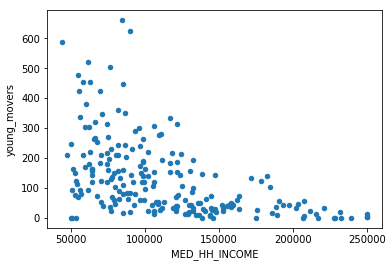

In [94]:
#df_merge.plot.scatter(x='Median Gross Rent (Dollars): Median gross rent', y='rate_under100')

df_merge.plot.scatter(x='MED_HH_INCOME', y='young_movers')
#assumption
#young people are more likely to move and be single 

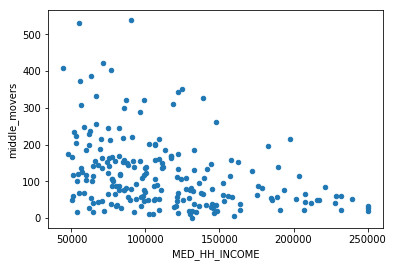

In [101]:
df_merge.plot.scatter(x='MED_HH_INCOME', y='middle_movers')

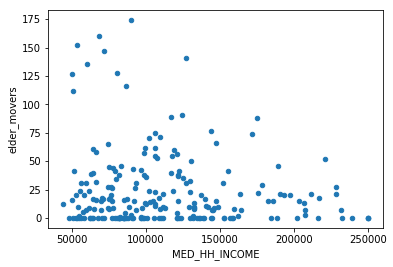

In [102]:
df_merge.plot.scatter(x='MED_HH_INCOME', y='elder_movers')

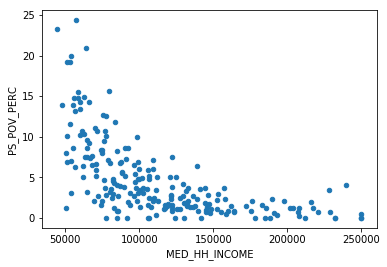

In [110]:
df_merge.plot.scatter(x='MED_HH_INCOME', y='PS_POV_PERC')

In [62]:
df_merge.columns

Index(['GEOID', 'RELOC_POV_TOT', 'RELOC_PL_SUB_100', 'RELOC_PL_100_149',
       'RELOC_PL_150_OVER', 'Unnamed: 0', 'NAME', 'state', 'county', 'tract',
       'Median Gross Rent (Dollars): Median gross rent'],
      dtype='object')